<a href="https://colab.research.google.com/github/nathanhogshead/AMD-Stock-Prediction/blob/Nathan/AMD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
url = "https://raw.githubusercontent.com/nathanhogshead/AMD-Stock-Prediction/main/AMD.xlsx"
xls = pd.ExcelFile(url, engine="openpyxl")

data = pd.read_excel(xls, parse_dates=["Date"])
close_col = [c for c in data.columns if "Adj Close" in c][0]
ts = data.set_index("Date")[close_col]

print(data.head())

        Date   Open   High    Low  Close   Adj Close     Volume
0 2022-07-11  77.85  78.29  75.84   76.95       76.95  76150300
1 2022-07-12  76.98  77.44  74.43   76.36       76.36  77873200
2 2022-07-13  74.94  79.11  74.48   77.52       77.52  79355000
3 2022-07-14  78.23  79.25  76.00   78.60       78.60  83493600
4 2022-07-15  79.36  81.20  77.90   81.11       81.11  76050600


In [12]:
import datetime
data.columns = data.columns.str.replace('\xa0', '', regex=False).str.strip()
data['Date'] = pd.to_datetime(data['Date'])
ts.head()

,Adj Close
Date,
2022-07-11,76.95
2022-07-12,76.36
2022-07-13,77.52
2022-07-14,78.60
2022-07-15,81.11


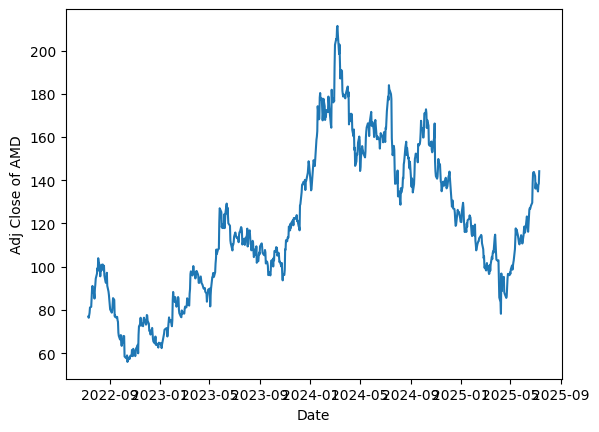

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import sklearn
import seaborn as sns

sns.lineplot(ts)
plt.ylabel("Adj Close of AMD")
mu = np.mean(data['Adj Close'])
#sns.lineplot(mu)

Based on the eye, the time series plot of AMD stock from July 11, 2022 to July 11, 2025 is not stationary. The variance seems more or less constant, but there is clearly a mean trend here.

We will compute the returns, which are generally stationary. Let $Y_{t}$ be the returns on time t and let $\text{AMD}_{t}$ be the adjusted closing price of AMD stock at time t. Then,
\begin{align}
Y_{t} &= \frac{\text{AMD}_{t} - \text{AMD}_{t-1}}{\text{AMD}_{t-1}}\\ &≈ \nabla log(\text{AMD}_{t})
\end{align} where $\nabla$ is the difference operator.

Text(0, 0.5, 'AMD Returns')

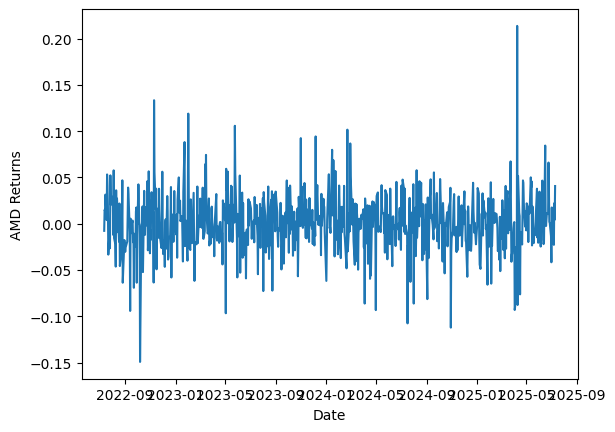

In [15]:
amd_return = np.log(ts).diff().dropna()
sns.lineplot(amd_return)
plt.ylabel("AMD Returns")